In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

## IMPORTING DATASET

In [16]:
df=pd.read_csv("dataset_pizza_data.csv")
df

,brand,price,weight,crust,cheese,size,toppings,spicy,ranking
0,Dominos,$1.00,100g,thin,Mozzarella,regular,paneer,normal,11
1,Pizza hut,$3.00,100g,thin,Cheddar,large,mushroom,normal,12
2,Onesta,$4.00,200g,thin,Mozzarella,regular,mushroom,normal,9
3,Pizza hut,$4.00,400g,thick,Cheddar,regular,paneer,normal,2
4,Pizza hut,$2.00,300g,thin,Mozzarella,regular,mushroom,extra,8
5,Pizza hut,$1.00,200g,thick,Mozzarella,large,paneer,extra,13
6,Onesta,$3.00,300g,thick,Mozzarella,large,paneer,normal,7
7,Dominos,$4.00,300g,thin,Cheddar,large,paneer,extra,4
8,Dominos,$2.00,400g,thick,Mozzarella,large,mushroom,normal,5
9,Oven Story,$4.00,100g,thick,Mozzarella,large,mushroom,extra,16


In [17]:
df.columns

Index(['brand', 'price', 'weight', 'crust', 'cheese', 'size', 'toppings',
       'spicy', 'ranking'],
      dtype='object')

## CONVERTING CATEGORICAL VARIABLES INTO NUMERICAL FORM

In [18]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [19]:
label_encoders = {}
for col in ['brand', 'weight', 'crust', 'cheese', 'size', 'toppings', 'spicy']:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


## INDEPENDENT AND DEPENDENT VARIABLE

In [20]:

X = df.drop(columns=['ranking'])
y = df['ranking']



## Perform regression


In [21]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [22]:

part_worths = pd.DataFrame({'Attribute': X.columns, 'Part-Worth': model.coef_})
print(part_worths)

df['Utility'] = model.predict(X)



  Attribute  Part-Worth
0     brand        0.05
1     price       -0.45
2    weight       -3.55
3     crust       -3.50
4    cheese        0.50
5      size        0.50
6  toppings       -2.25
7     spicy       -1.50


## THE BEST COMBINATION

In [23]:
best_combination_idx = df['Utility'].idxmax()

best_combination = df.loc[best_combination_idx].copy()
for col in ['brand', 'weight', 'crust', 'cheese', 'size', 'toppings', 'spicy']:
    best_combination[col] = label_encoders[col].inverse_transform([int(best_combination[col])])[0]

print("Best Combination:\n", best_combination)

Best Combination:
 brand       Oven Story
price              4.0
weight            100g
crust            thick
cheese      Mozzarella
size             large
toppings      mushroom
spicy            extra
ranking           16.0
Utility           16.8
Name: 9, dtype: object


## PLOTTING

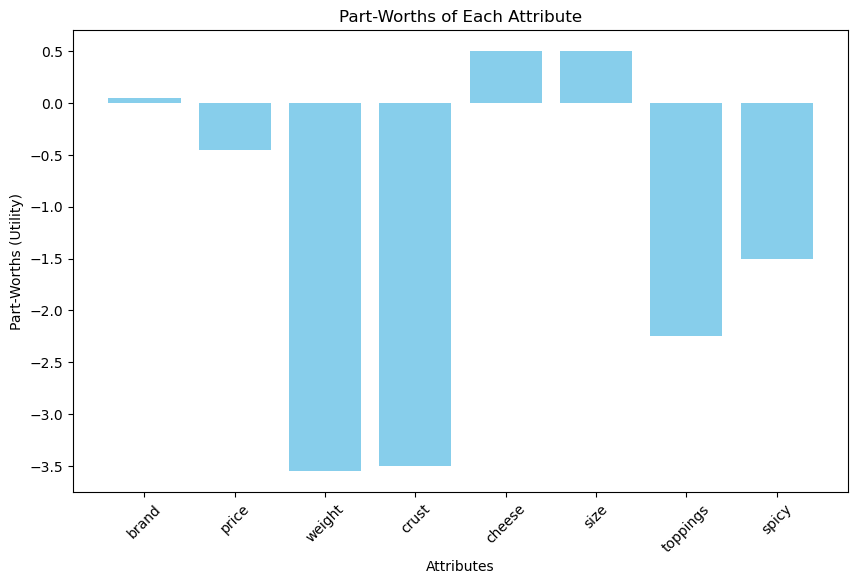

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(part_worths['Attribute'], part_worths['Part-Worth'], color='skyblue')
plt.title('Part-Worths of Each Attribute')
plt.xlabel('Attributes')
plt.ylabel('Part-Worths (Utility)')
plt.xticks(rotation=45)
plt.show()